In [1]:
from sklearn.datasets import fetch_mldata

mnist= fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
X, y= mnist["data"], mnist["target"]
X.shape

(70000, 784)

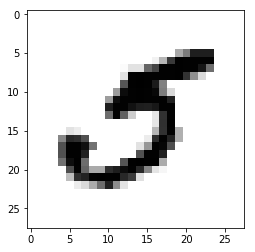

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

some_digit= X[36000]
some_digit_image= some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [4]:
y[36000]

5.0

In [5]:
X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
import numpy as np
shuffle_index= np.random.permutation(60000)
X_train, y_train= X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_5= (y_train==5)
y_test_5= (y_test==5)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds= StratifiedKFold(n_splits=3, random_state=42)

In [11]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf= clone(sgd_clf)
    X_train_folds= X_train[train_index]
    y_train_folds= (y_train_5[train_index])
    X_test_folds= X_train[test_index]
    y_test_folds= (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred= clone_clf.predict(X_test_folds)
    n_correct= sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.95955


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9221


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.88805


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.95955, 0.9221 , 0.88805])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf= Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9103 , 0.91   , 0.90865])

In [15]:
from sklearn.model_selection import  cross_val_predict

y_train_pred= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[51012,  3567],
       [ 1039,  4382]], dtype=int64)

In [17]:
y_train_perfect_predictions= y_train_5

In [18]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [19]:
# Precision= TP/(TP +FP)

#Recall= TP/(TP+FN)

In [20]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))


0.5512643099760977
0.8083379450285925


In [21]:
3961/(3961+681)

0.8532959931064197

In [22]:
3961/(3961+1460)

0.7306769968640472

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.6554973821989529

In [24]:
y_scores= sgd_clf.decision_function([some_digit])
y_scores

array([259116.43969471])

In [25]:
y_scores= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [26]:
y_scores

array([-448232.34551781, -476850.64710139, -704211.82800279, ...,
       -129235.76372098, -297541.12842429,  -92911.45364979])

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'r--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'b-', label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.show()

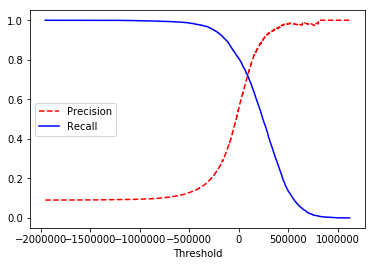

In [29]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [30]:
y_train_pred_90= (y_scores>50000)

In [31]:
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.6442848219862586

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.7611141855746172

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(y_train_5, y_train_pred)

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rates')
    plt.ylabel('True Positive Rates')
    plt.show()

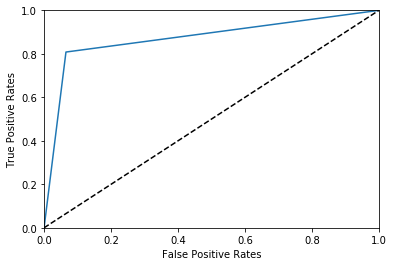

In [36]:
plot_roc_curve(fpr, tpr)

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_train_pred)

0.8714915691173855

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
y_scores_forest= y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest=  roc_curve(y_train_5, y_scores_forest)

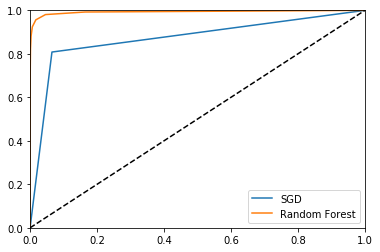

In [40]:
plt.plot(fpr, tpr, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.legend(loc='lower right')
plt.show()

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.9927032958110212

In [42]:
y_scores_forest_binary= (y_scores_forest==1)

In [43]:
precision_score(y_train_5, y_scores_forest_binary)

0.9992867332382311

In [44]:
recall_score(y_train_5, y_scores_forest_binary)

0.2584394023242944

In [45]:
sgd_clf.fit(X_train, y_train)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [46]:
sgd_clf.predict([some_digit])

array([5.])

In [47]:
some_digit_scores= sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-136048.96419608, -462463.46385237, -298197.60496003,
        -396116.34025378, -441064.86818007,  259116.43969471,
        -970529.19965514, -385056.07156945, -666483.68118932,
        -445525.21489844]])

In [48]:
np.argmax(some_digit_scores)

5

In [49]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [50]:
sgd_clf.classes_[5]

5.0

In [51]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf= OneVsOneClassifier(SGDClassifier(random_state=123))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([5.])

In [52]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [53]:
forest_clf.predict([some_digit])

array([5.])

In [54]:
forest_clf.predict_proba([some_digit])

array([[0. , 0.1, 0.1, 0. , 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [55]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.87207558, 0.84889244, 0.87228084])

In [56]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()
X_train_scaled= std_scale.fit_transform(X_train)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.91056789, 0.90684534, 0.91168675])

In [58]:
y_train_pred= cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mat= confusion_matrix(y_train, y_train_pred)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [59]:
conf_mat

array([[5735,    3,   24,   10,    9,   46,   45,    8,   39,    4],
       [   2, 6491,   47,   28,    6,   37,    8,   14,   99,   10],
       [  60,   39, 5327,  101,   77,   21,  102,   61,  152,   18],
       [  49,   39,  140, 5353,    1,  223,   34,   53,  134,  105],
       [  22,   27,   45,    7, 5356,   11,   49,   30,   81,  214],
       [  80,   47,   32,  188,   72, 4602,  112,   27,  170,   91],
       [  35,   19,   44,    2,   40,   96, 5631,    4,   46,    1],
       [  28,   21,   68,   31,   60,   10,    6, 5806,   15,  220],
       [  47,  162,   69,  154,   15,  172,   57,   25, 5000,  150],
       [  47,   36,   28,   84,  150,   37,    2,  205,   79, 5281]],
      dtype=int64)

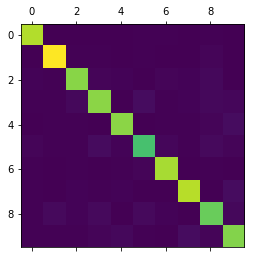

In [61]:
plt.matshow(conf_mat)

In [63]:
row_sums= conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat= conf_mat/row_sums

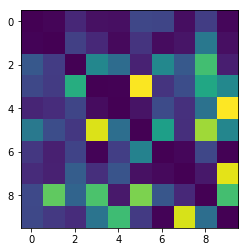

In [64]:
np.fill_diagonal(norm_conf_mat, 0)
plt.imshow(norm_conf_mat)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large= (y_train>=7)
y_train_odd= (y_train%2==1)
y_multilabel= np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False, False],
       [False,  True],
       [False,  True],
       ...,
       [False, False],
       [ True,  True],
       [ True, False]])

In [73]:
knn_clf= KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [75]:
y_train_knn_pred= cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average='macro')

0.9681738841688725

In [79]:
noise_train= np.random.randint(0, 100, (len(X_train), 784))
noise_test= np.random.randint(0, 100, (len(X_test), 784))
X_train_mod= X_train+noise_train
X_test_mod= X_test+noise_test
y_train_mod=X_train
y_test_mod=X_test

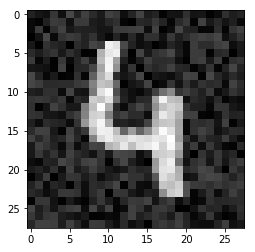

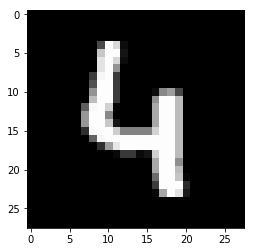

In [83]:
plt.imshow(X_train_mod[55000].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(X_train[55000].reshape(28,28), cmap='gray')
plt.show()

In [84]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [86]:
clean_digit= knn_clf.predict([X_test_mod[5500]])

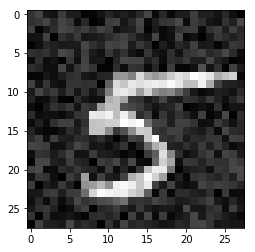

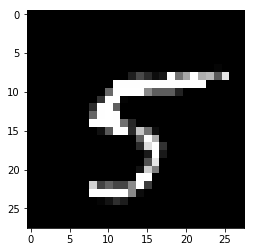

In [89]:
plt.imshow(X_test_mod[5500].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(clean_digit.reshape(28,28), cmap='gray')
plt.show()